## Import and environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = "C:/Users/Leo-PC/Desktop/OpenClassroom Stuff/Projet 2/datas/"

## Code Pré-analyse

### EdStatsCountry

In [2]:
country = pd.read_csv(path + 'EdStatsCountry.csv')
country.head(5).T

,0,1,2,3,4
Country Code,ABW,AFG,AGO,ALB,AND
Short Name,Aruba,Afghanistan,Angola,Albania,Andorra
Table Name,Aruba,Afghanistan,Angola,Albania,Andorra
Long Name,Aruba,Islamic State of Afghanistan,People's Republic of Angola,Republic of Albania,Principality of Andorra
2-alpha code,AW,AF,AO,AL,AD
Currency Unit,Aruban florin,Afghan afghani,Angolan kwanza,Albanian lek,Euro
Special Notes,SNA data for 2000-2011 are updated from offici...,Fiscal year end: March 20; reporting period fo...,"April 2013 database update: Based on IMF data,...",NaN,NaN
Region,Latin America & Caribbean,South Asia,Sub-Saharan Africa,Europe & Central Asia,Europe & Central Asia
Income Group,High income: nonOECD,Low income,Upper middle income,Upper middle income,High income: nonOECD
WB-2 code,AW,AF,AO,AL,AD


In [3]:
print(country.shape)
print(country.info())
#Il y'a un total de 32 colonnes pour 241 entités
all_countries = country['Short Name'].tolist()
print(all_countries)

(241, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   

In [4]:
countries_only = country.dropna(subset=['Income Group'])
#print(countries_only.columns)
all_countries = countries_only['Short Name'].tolist()
print(f"{len(countries_only)}\n{all_countries} ")

214
['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Gren

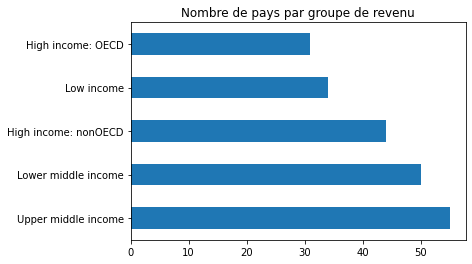

In [5]:
#all_incomes = set(countries_only['Income Group'].tolist())
#print(all_incomes)
income_count = countries_only['Income Group'].value_counts()
income_count.plot(kind='barh')
plt.title('Nombre de pays par groupe de revenu')
plt.show()

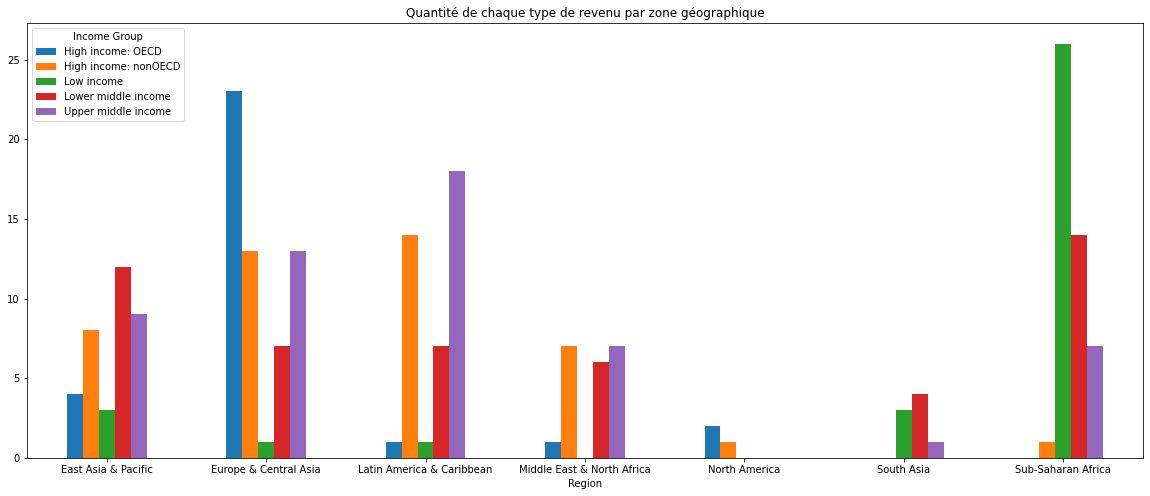

In [6]:
countries_only.groupby(['Region','Income Group']).size().unstack().plot(kind='bar',stacked=False)
plt.gcf().set_size_inches(20, 8)
#using gcf to get the current figure
plt.title('Quantité de chaque type de revenu par zone géographique')
plt.xticks(rotation=0)
plt.show()

### EdStatsCountry_series

In [7]:
country_series = pd.read_csv(path + 'EdStatsCountry-series.csv')
country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [8]:
print(country_series.shape)

(613, 4)


In [9]:
country_code = country_series['CountryCode'].unique()
print(country_code, len(country_code))

['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP'
 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MNP'
 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC' 'NLD' 'NOR'
 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG' 'POL' 'PRI' 'PRK'
 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'S

### EdStatsData

In [10]:
data = pd.read_csv(path + 'EdStatsData.csv')
data.head(5).T

,0,1,2,3,4
Country Name,Arab World,Arab World,Arab World,Arab World,Arab World
Country Code,ARB,ARB,ARB,ARB,ARB
Indicator Name,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, primary, both sex..."
Indicator Code,UIS.NERA.2,UIS.NERA.2.F,UIS.NERA.2.GPI,UIS.NERA.2.M,SE.PRM.TENR
1970,NaN,NaN,NaN,NaN,54.8221
...,...,...,...,...,...
2085,NaN,NaN,NaN,NaN,NaN
2090,NaN,NaN,NaN,NaN,NaN
2095,NaN,NaN,NaN,NaN,NaN
2100,NaN,NaN,NaN,NaN,NaN


In [11]:
print(data.shape)
names = data["Country Name"].unique()
codes = data["Country Code"].unique()
indicators = data["Indicator Name"].unique()
print(len(names))
print(len(codes))
print(indicators , len(indicators))

(886930, 70)
242
242
['Adjusted net enrolment rate, lower secondary, both sexes (%)'
 'Adjusted net enrolment rate, lower secondary, female (%)'
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)'
 ... 'Youth literacy rate, population 15-24 years, female (%)'
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)'
 'Youth literacy rate, population 15-24 years, male (%)'] 3665


In [12]:
new_data = data[data['Country Name'].isin(all_countries)]
new_data.shape

(714675, 70)

In [13]:
new_data_counted = new_data.groupby('Country Name').count()
new_data_counted

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3665,3665,3665,523,139,158,236,351,537,164,...,0,0,0,0,0,0,0,0,0,0
Albania,3665,3665,3665,409,78,74,50,50,410,105,...,308,308,308,308,308,308,308,308,308,0
Algeria,3665,3665,3665,416,190,298,325,327,688,328,...,308,308,308,308,308,308,308,308,308,0
American Samoa,3665,3665,3665,2,9,23,23,23,23,21,...,0,0,0,0,0,0,0,0,0,0
Andorra,3665,3665,3665,41,63,63,63,63,99,63,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,3665,3665,3665,131,131,127,131,131,106,127,...,308,308,308,308,308,308,308,308,308,0
Vietnam,3665,3665,3665,410,50,50,50,50,410,120,...,308,308,308,308,308,308,308,308,308,0
West Bank and Gaza,3665,3665,3665,35,35,35,35,35,36,41,...,308,308,308,308,308,308,308,308,308,0


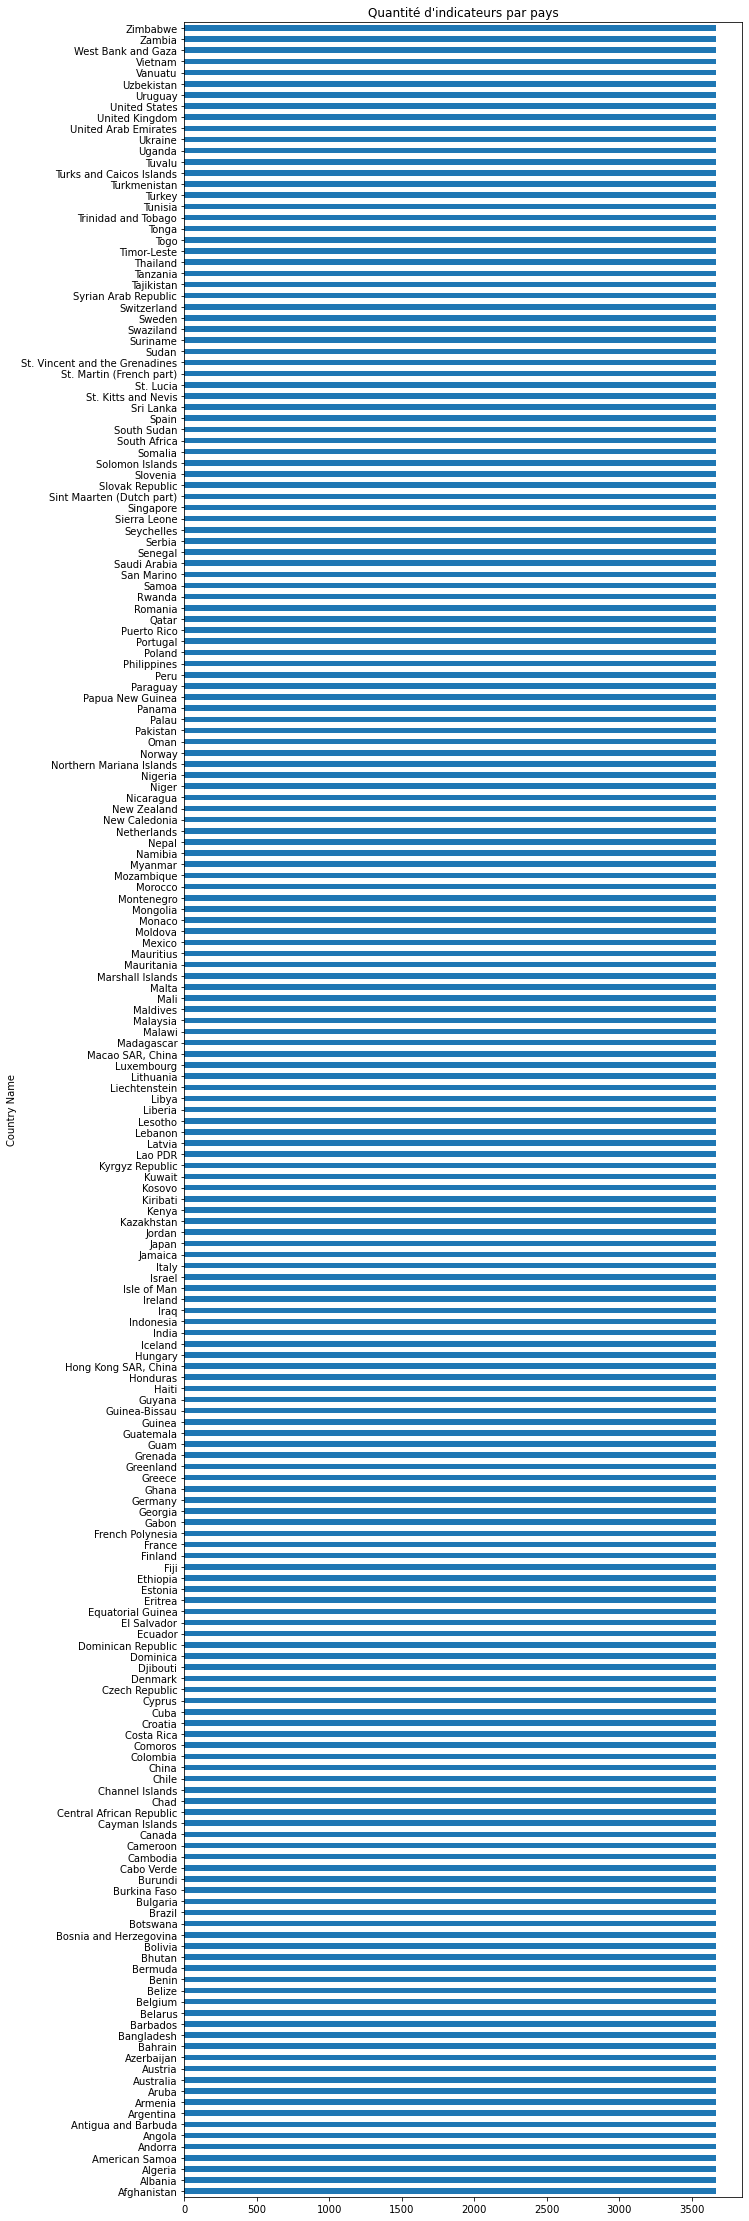

In [14]:
new_data.groupby("Country Name")["Indicator Name"].count().plot(kind ='barh')
plt.gcf().set_size_inches(10, 40)
plt.title("Quantité d'indicateurs par pays")
plt.show()

### EdStatsFootNote

In [15]:
footnote = pd.read_csv(path + 'EdStatsFootNote.csv')
footnote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [16]:
new_data_regroup = new_data.copy()

new_data_regroup.loc[:,'1970s'] = new_data[[str(year) for year in range(1970,1980,1)]].mean(1)
new_data_regroup.loc[:,'1980s'] = new_data[[str(year) for year in range(1980,1990,1)]].mean(1)
new_data_regroup.loc[:,'1990s'] = new_data[[str(year) for year in range(1990,2000,1)]].mean(1)
new_data_regroup.loc[:,'2000s'] = new_data[[str(year) for year in range(2000,2010,1)]].mean(1)
new_data_regroup.loc[:,'2010s'] = new_data[[str(year) for year in range(2010,2017,1)]].mean(1)
new_data_regroup.loc[:,'2020s'] = new_data[[str(year) for year in [2020,2025]]].mean(1)
new_data_regroup.loc[:,'2030s'] = new_data[[str(year) for year in [2030,2035]]].mean(1)
new_data_regroup.loc[:,'2040s'] = new_data[[str(year) for year in [2040,2045]]].mean(1)
new_data_regroup.loc[:,'2050s'] = new_data[[str(year) for year in [2050,2055]]].mean(1)
new_data_regroup.loc[:,'2060s'] = new_data[[str(year) for year in [2060,2065]]].mean(1)
new_data_regroup.loc[:,'2070s'] = new_data[[str(year) for year in [2070,2075]]].mean(1)
new_data_regroup.loc[:,'2080s'] = new_data[[str(year) for year in [2080,2085]]].mean(1)
new_data_regroup.loc[:,'2090s'] = new_data[[str(year) for year in [2090,2095]]].mean(1)
new_data_regroup.loc[:,'2100s'] = new_data[[str(2100)]].mean(1)

new_data_regroup.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)


new_data_regroup.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,7.05911,NaN,17.260189,28.059870,49.032011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,2.53138,NaN,9.431810,15.223100,35.857401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.22154,NaN,0.386230,0.379130,0.582715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,11.42652,NaN,24.420429,40.152851,61.497005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


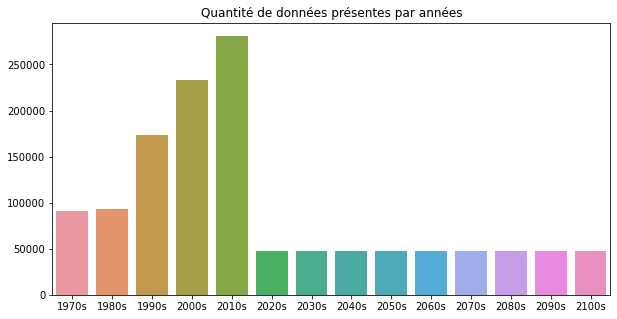

In [17]:
plt.figure(figsize=(10, 5))
all_decade = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s','2050s', '2060s', '2070s', '2080s', '2090s', '2100s']
plt.title('Quantité de données présentes par années')
plot = sns.barplot(y = new_data_regroup.groupby('Country Name')[all_decade].count().sum().values, 
                   x = new_data_regroup.groupby('Country Name')[all_decade].count().sum().index)
plt.show()

In [18]:
new_data_regroup_cleaned = new_data_regroup.drop(['1970s','1980s','1990s','2000s','2020s','2030s','2040s','2050s','2060s','2070s','2080s','2090s','2100s'],axis=1)
new_data_regroup_cleaned.head(5)
new_data_regroup_cleaned

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,49.032011
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,35.857401
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.582715
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,61.497005
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.046085


### EdStatsSeries

In [19]:
series = pd.read_csv(path + 'EdStatsSeries.csv')
series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
series.shape

(3665, 21)

## Selection des données

### Selection des pays

In [21]:
new_data_regroup_cleaned.head(5)
new_data_regroup_cleaned

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,49.032011
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,35.857401
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.582715
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,61.497005
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.046085


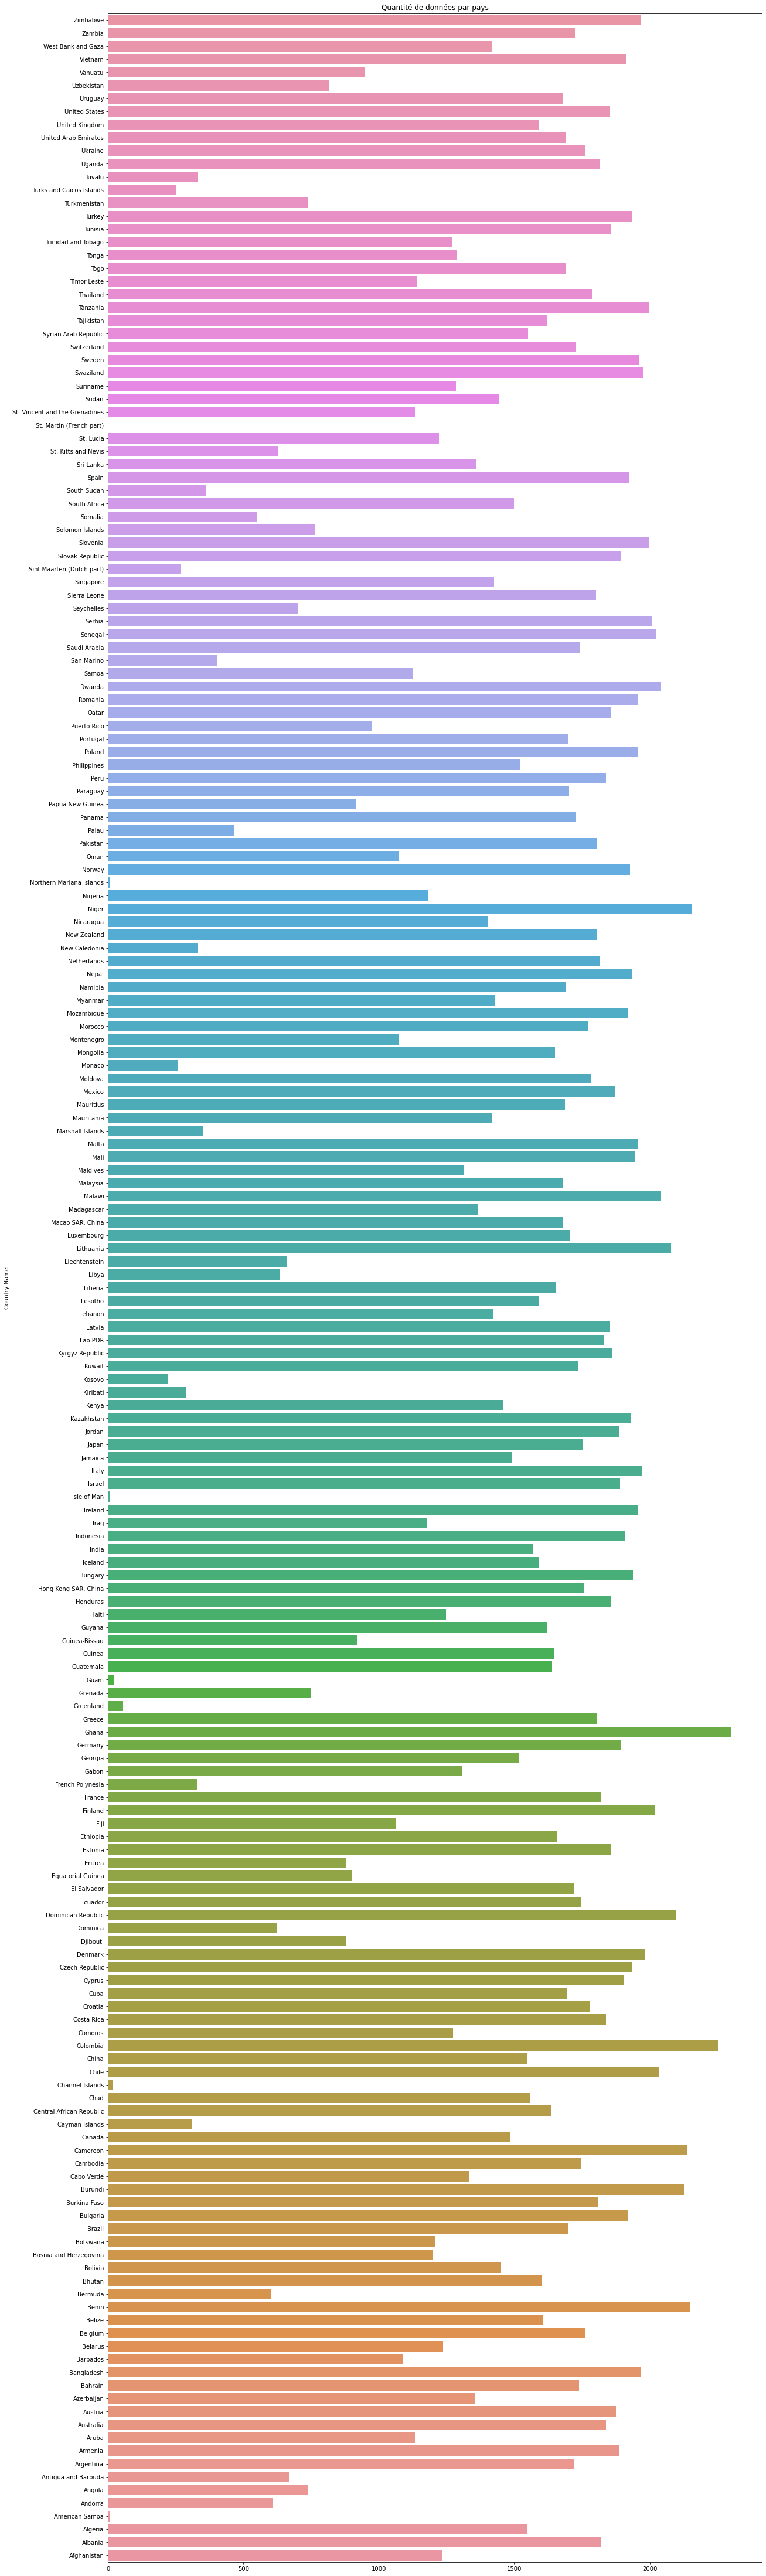

In [22]:
plt.figure(figsize=(20, 80))
plt.title('Quantité de données par pays')
plot = sns.barplot(new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().values, 
                   new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().index)
plt.gca().invert_yaxis()

In [23]:
indexes = new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().index
values = new_data_regroup_cleaned.groupby('Country Name')['2010s'].count().values
data_per_country = dict(zip(indexes,values))


#country_to_remove = {k: v for k, v in data_per_country.items() if v <= 1500}
country_to_keep = {k: v for k, v in data_per_country.items() if v >= 1500}
list_country_to_keep = list(country_to_keep.keys())
print(len(list_country_to_keep))


indexNames = new_data_regroup_cleaned[~new_data_regroup_cleaned['Country Name'].isin(list_country_to_keep)].index
new_data_regroup_cleaned.drop(indexNames , inplace=True)
new_data_regroup_cleaned

#our_countries  = set(data_country_to_keep['Country Name'].to_list())
#print(our_countries, len(our_countries))

116


,Country Name,Country Code,Indicator Name,Indicator Code,2010s
95290,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,88.222420
95291,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,87.744015
95292,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.989560
95293,Albania,ALB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,88.671955
95294,Albania,ALB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.446022
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.046085


### Selection des indicateurs

In [24]:
indicator_occ = new_data_regroup_cleaned.groupby('Indicator Name')['2010s'].count().sort_values(ascending=False)
indicator_occ = pd.DataFrame(indicator_occ)
indicator_occ

,2010s
Indicator Name,
"Population, male",116
"Unemployment, total (% of total labor force)",116
"Population, ages 0-14 (% of total)",116
"Population, ages 0-14, female",116
"Population, ages 0-14, male",116
...,...
LLECE: Distribution of 4th Grade Reading Scores: 25th Percentile Score,0
LLECE: Distribution of 4th Grade Reading Scores: 10th Percentile Score,0
LLECE: Distribution of 4th Grade Mathematics Scores: 90th Percentile Score,0


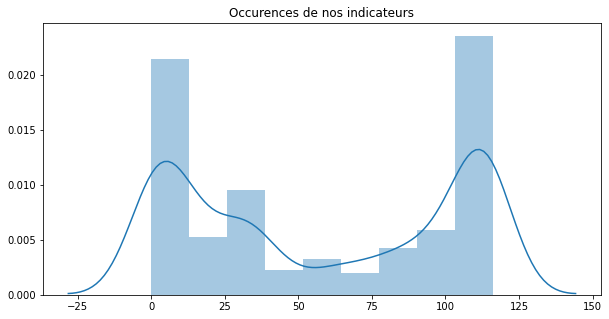

In [25]:
plt.figure(figsize=(10,5))
plt.title('Occurences de nos indicateurs')
sns.distplot(indicator_occ)
plt.show()

In [26]:
indicator_to_keep = indicator_occ[indicator_occ['2010s']>= 100]
list_of_indicators = indicator_to_keep.reset_index()["Indicator Name"].to_list()
print(len(list_of_indicators))

1196


In [27]:
new_data_regroup_cleaned_filtered = new_data_regroup_cleaned[new_data_regroup_cleaned['Indicator Name'].isin(list_of_indicators)]
new_data_regroup_cleaned_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
95294,Albania,ALB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.446022
95295,Albania,ALB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,93.349535
95296,Albania,ALB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.985220
95297,Albania,ALB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,94.750483
95302,Albania,ALB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,80.981613
...,...,...,...,...,...
886917,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,760.565000
886918,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,1544.635000
886919,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,1562.390000
886920,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,1741.100000


In [28]:
new_data_regroup_cleaned_filtered = new_data_regroup_cleaned_filtered.dropna(subset=['2010s'])
new_data_regroup_cleaned_filtered

#list_of_indicators

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
95294,Albania,ALB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.446022
95295,Albania,ALB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,93.349535
95296,Albania,ALB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.985220
95297,Albania,ALB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,94.750483
95302,Albania,ALB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,80.981613
...,...,...,...,...,...
886917,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,760.565000
886918,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,1544.635000
886919,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,1562.390000
886920,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,1741.100000


In [29]:
indicateurs = ['Population, total',
'Internet users (per 100 people)',
'Enrolment in upper secondary education, both sexes (number)',
'Enrolment in tertiary education, all programmes, both sexes (number)',
'Population, ages 15-24, total']

#réalisons un idx to word pour simplifier la présentation

word_to_id = {token: token if token.isdigit() else idx for idx, token in enumerate(set(indicateurs))}
print(word_to_id)

{'Internet users (per 100 people)': 0, 'Population, total': 1, 'Enrolment in tertiary education, all programmes, both sexes (number)': 2, 'Enrolment in upper secondary education, both sexes (number)': 3, 'Population, ages 15-24, total': 4}


## Analyse exploratoire des données

In [30]:
indicators_data = new_data_regroup_cleaned_filtered[new_data_regroup_cleaned_filtered['Indicator Name'].isin(indicateurs)]

indicators_data_copy = indicators_data.copy()
indicators_data_copy.loc[:,'Indicator Name'] = indicators_data['Indicator Name'].map(word_to_id)
indicators_data_copy
#print(set(indicators_data['Indicator Name'].to_list()))

,Country Name,Country Code,Indicator Name,Indicator Code,2010s
96494,Albania,ALB,2,SE.TER.ENRL,1.542362e+05
96504,Albania,ALB,3,UIS.E.3,1.498670e+05
96665,Albania,ALB,0,IT.NET.USER.P2,5.651033e+01
97772,Albania,ALB,4,SP.POP.1524.TO.UN,5.856280e+05
97823,Albania,ALB,1,SP.POP.TOTL,2.894231e+06
...,...,...,...,...,...
884469,Zimbabwe,ZWE,2,SE.TER.ENRL,1.023196e+05
884479,Zimbabwe,ZWE,3,UIS.E.3,4.857640e+05
884640,Zimbabwe,ZWE,0,IT.NET.USER.P2,1.493251e+01
885747,Zimbabwe,ZWE,4,SP.POP.1524.TO.UN,3.370104e+06


In [31]:
#indicators_data.sort_values(["Indicator Name"])
merged_left = pd.merge(left=indicators_data_copy, right=countries_only, how='left', left_on='Country Name', right_on='Short Name')
indicators_data_copy = merged_left.drop(['Country Code_x','Country Code_y', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31'], axis=1)
indicators_data_copy.head(5)

,Country Name,Indicator Name,Indicator Code,2010s,Region,Income Group
0,Albania,2,SE.TER.ENRL,1.542362e+05,Europe & Central Asia,Upper middle income
1,Albania,3,UIS.E.3,1.498670e+05,Europe & Central Asia,Upper middle income
2,Albania,0,IT.NET.USER.P2,5.651033e+01,Europe & Central Asia,Upper middle income
3,Albania,4,SP.POP.1524.TO.UN,5.856280e+05,Europe & Central Asia,Upper middle income
4,Albania,1,SP.POP.TOTL,2.894231e+06,Europe & Central Asia,Upper middle income


In [32]:
recap_table_country = indicators_data_copy.pivot(index='Country Name', columns='Indicator Name', values='2010s')
recap_table_country

Indicator Name,0,1,2,3,4
Country Name,,,,,
Albania,56.510334,2.894231e+06,1.542362e+05,149867.00,5.856280e+05
Algeria,25.535075,3.834750e+07,1.221773e+06,1319508.00,6.869491e+06
Argentina,59.227690,4.253773e+07,2.709143e+06,1645002.25,6.873357e+06
Armenia,44.589312,2.896616e+06,1.241345e+05,97679.60,5.133975e+05
Australia,82.105767,2.308494e+07,1.361789e+06,1060782.40,2.921038e+06
...,...,...,...,...,...
United States,73.035771,3.162575e+08,2.027375e+07,11728330.80,4.524368e+07
Uruguay,57.486919,3.408561e+06,1.506605e+05,118060.00,5.192428e+05
Vietnam,38.860000,8.978640e+07,2.319985e+06,NaN,1.777147e+07


In [33]:
recap_table_country = recap_table_country.dropna()
recap_table_country

Indicator Name,0,1,2,3,4
Country Name,,,,,
Albania,56.510334,2.894231e+06,1.542362e+05,149867.00,5.856280e+05
Algeria,25.535075,3.834750e+07,1.221773e+06,1319508.00,6.869491e+06
Argentina,59.227690,4.253773e+07,2.709143e+06,1645002.25,6.873357e+06
Armenia,44.589312,2.896616e+06,1.241345e+05,97679.60,5.133975e+05
Australia,82.105767,2.308494e+07,1.361789e+06,1060782.40,2.921038e+06
...,...,...,...,...,...
United Arab Emirates,84.357143,8.906379e+06,1.282603e+05,139337.20,7.128560e+05
United Kingdom,89.441457,6.417615e+07,2.441278e+06,3325021.90,7.904708e+06
United States,73.035771,3.162575e+08,2.027375e+07,11728330.80,4.524368e+07


In [34]:
list(recap_table_country.columns)
word_to_id

{'Internet users (per 100 people)': 0,
 'Population, total': 1,
 'Enrolment in tertiary education, all programmes, both sexes (number)': 2,
 'Enrolment in upper secondary education, both sexes (number)': 3,
 'Population, ages 15-24, total': 4}

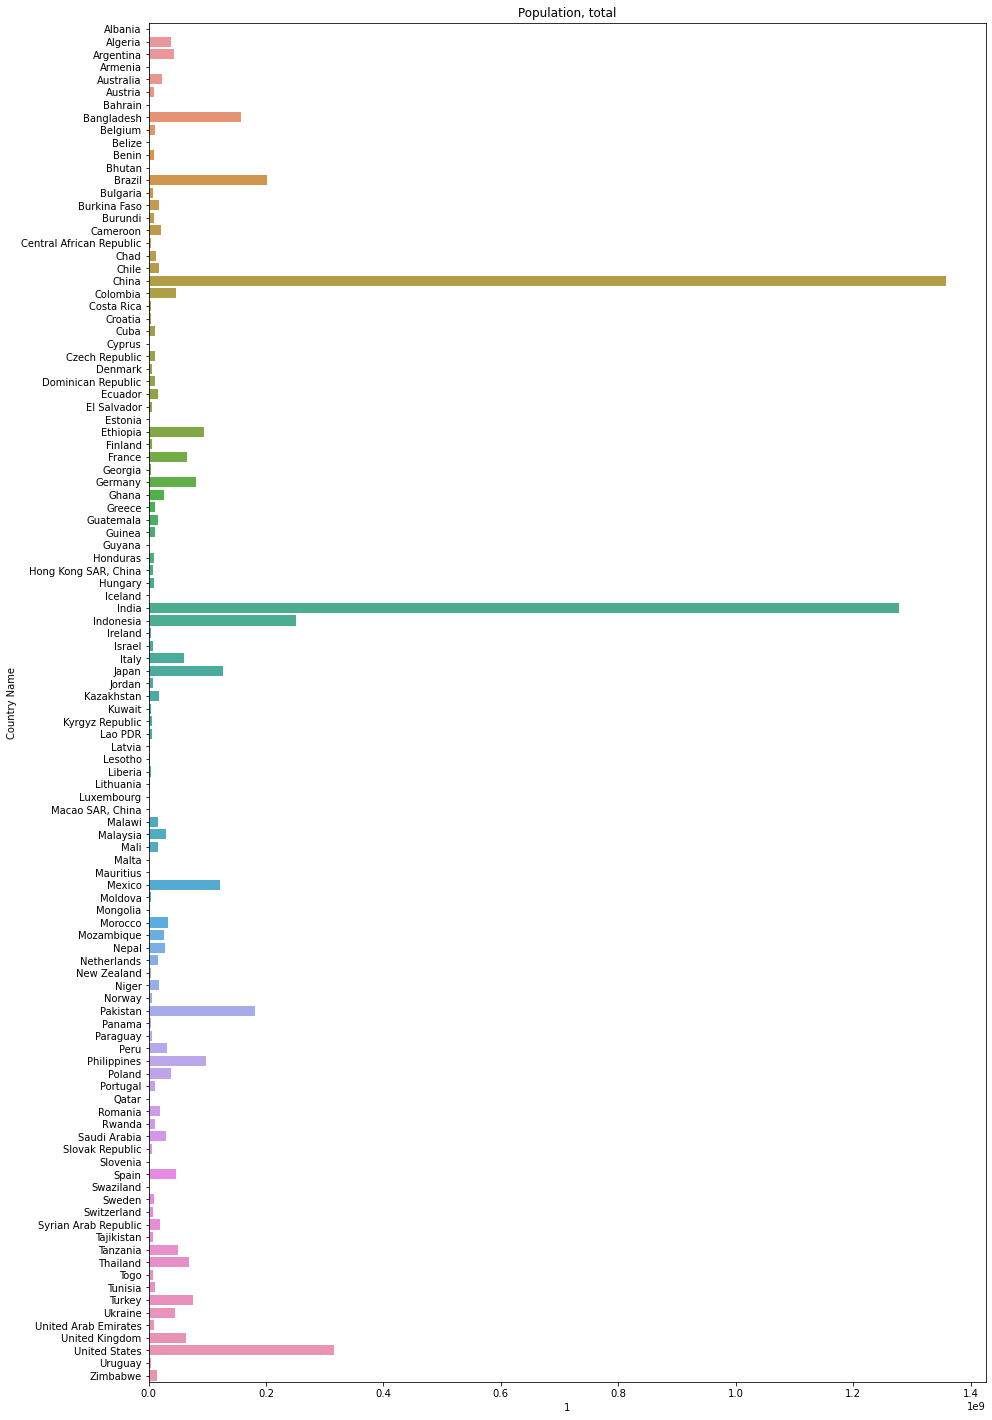

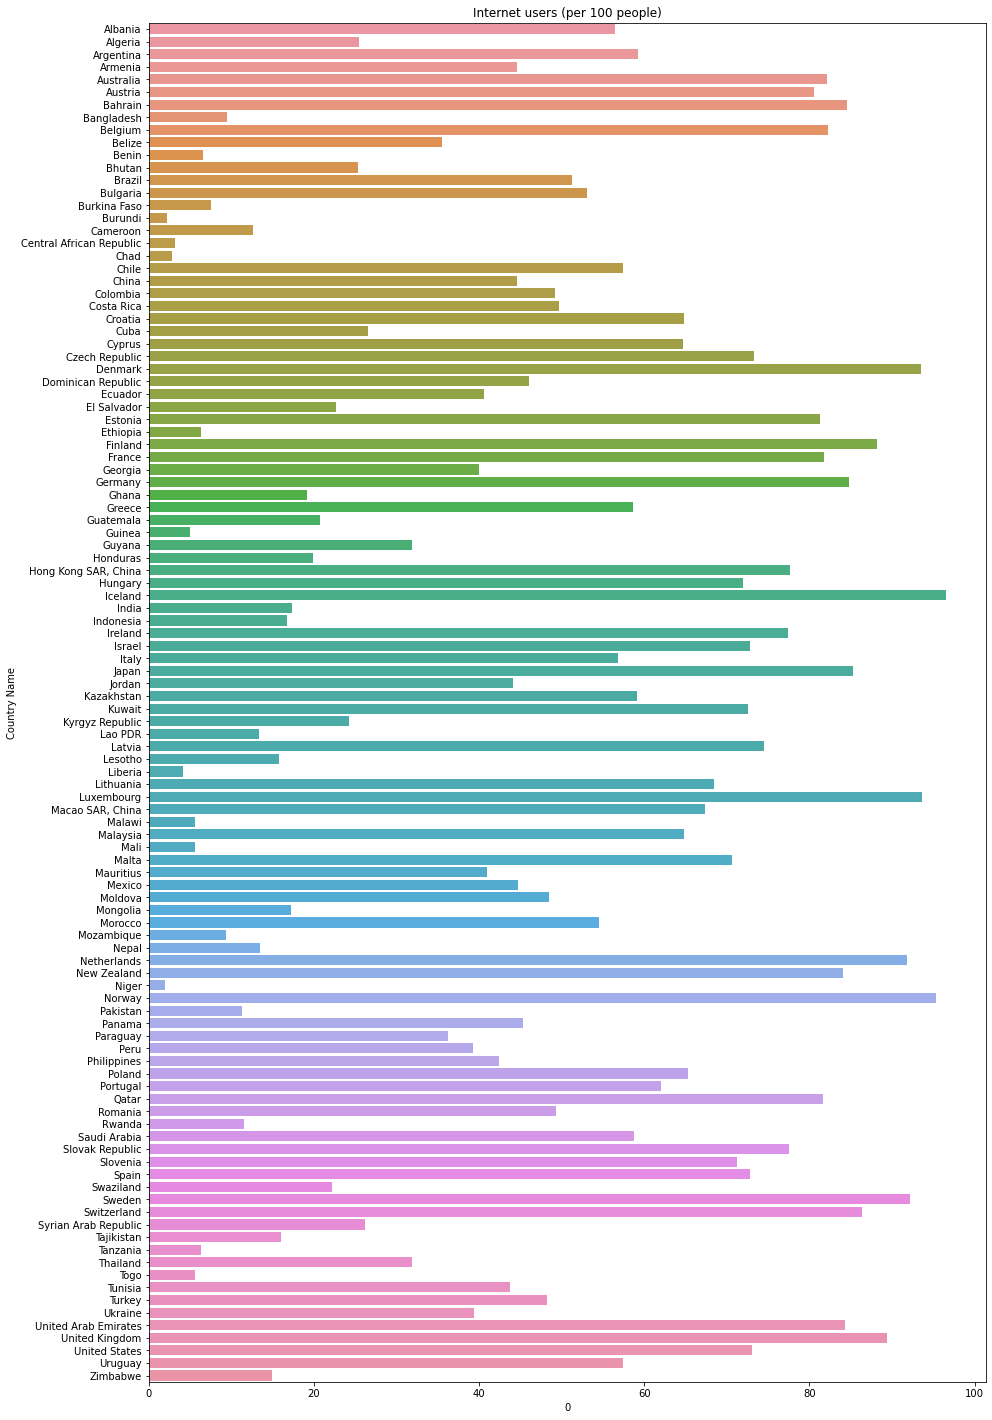

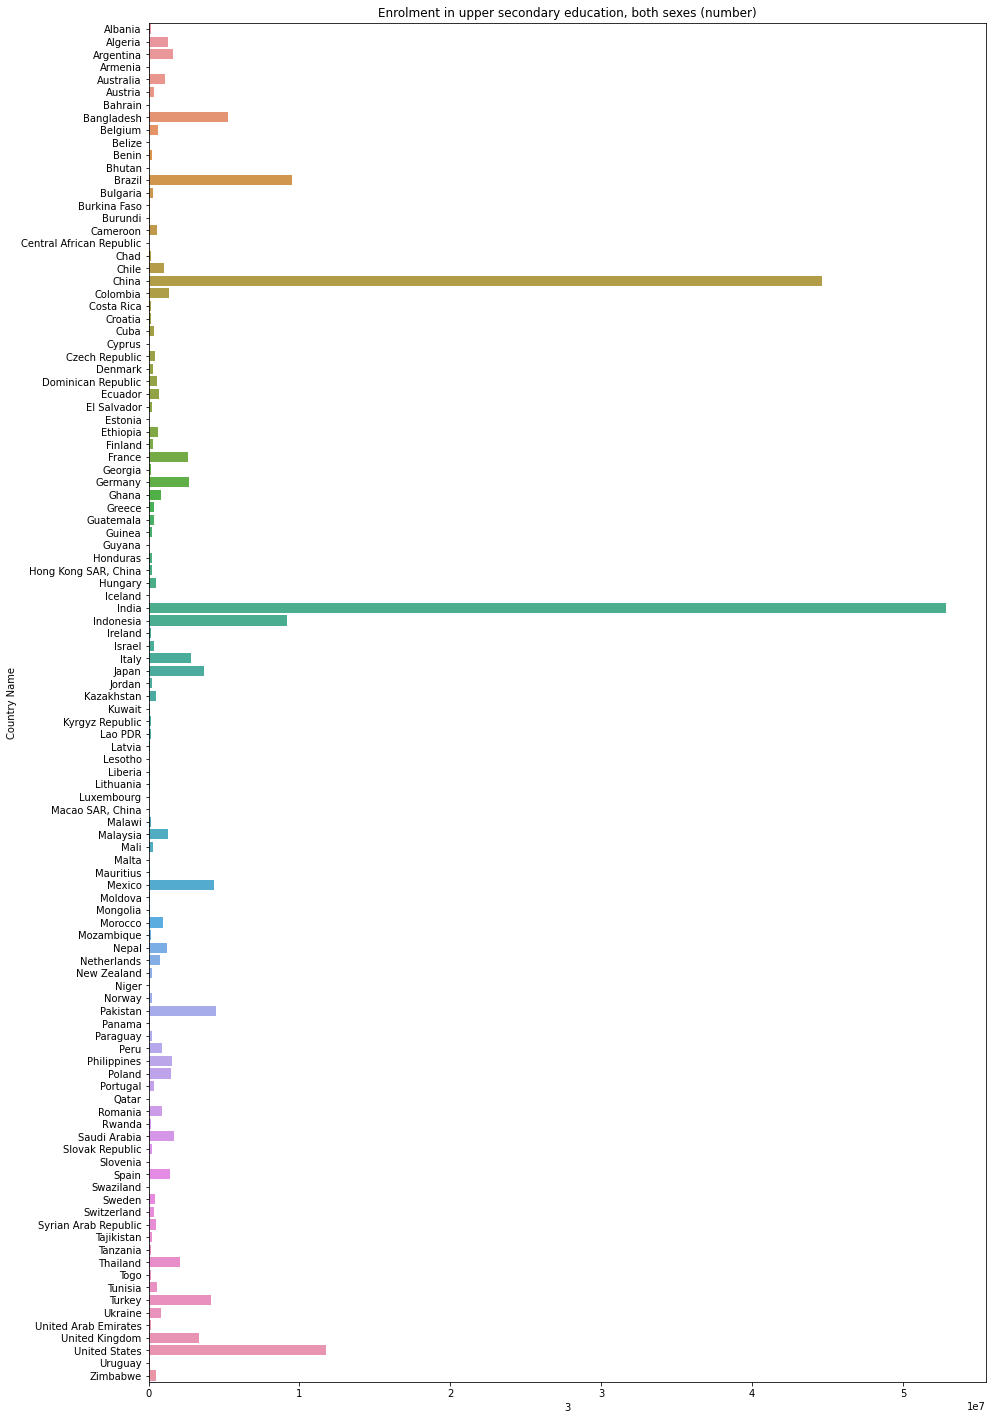

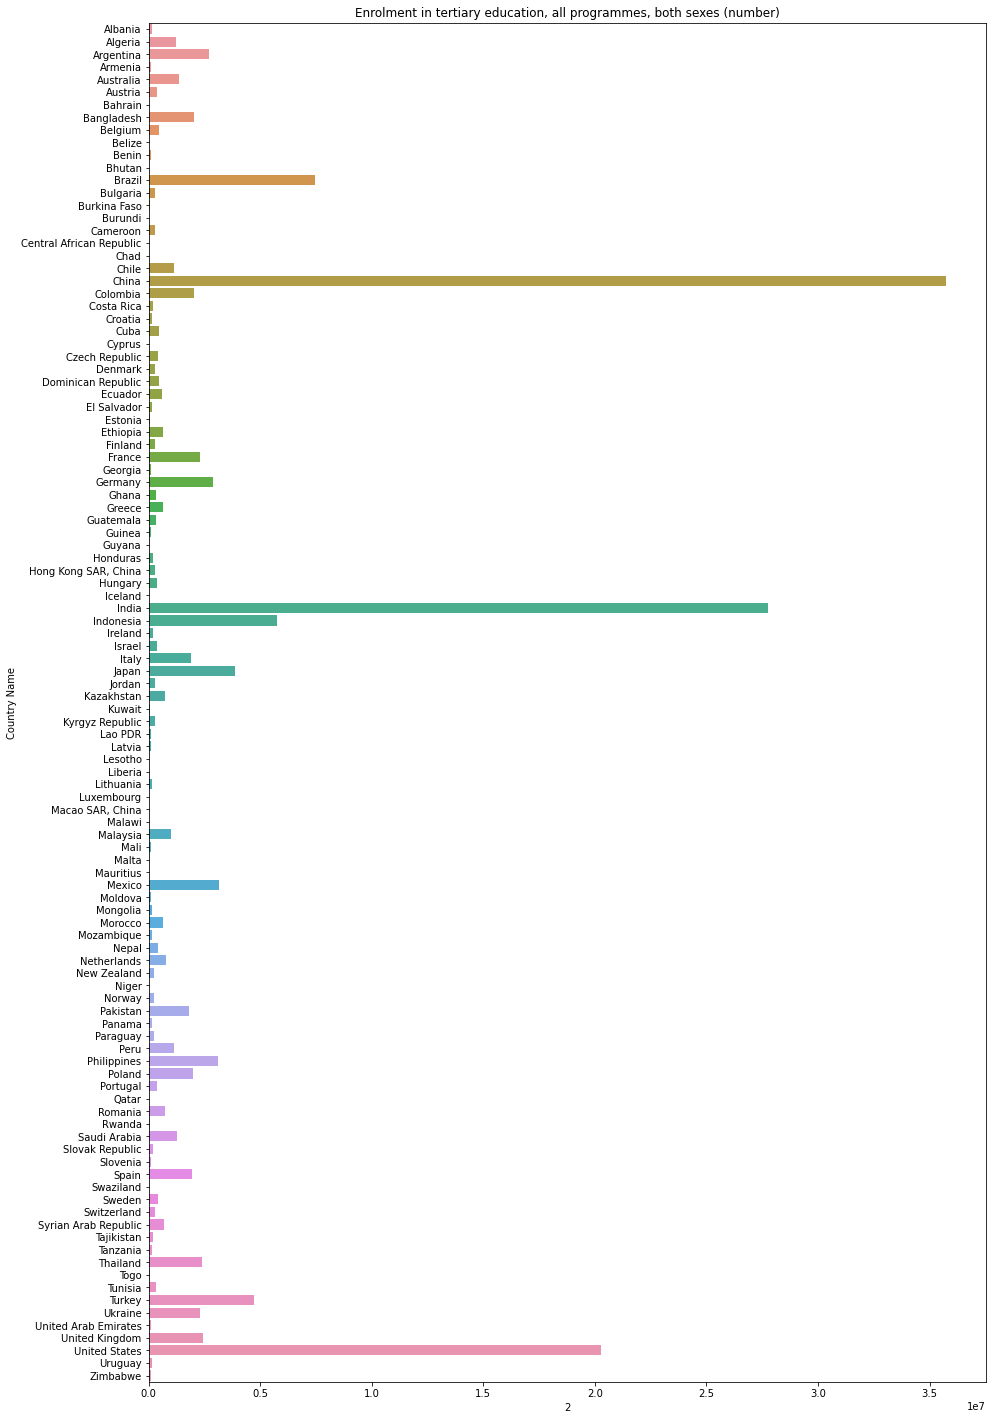

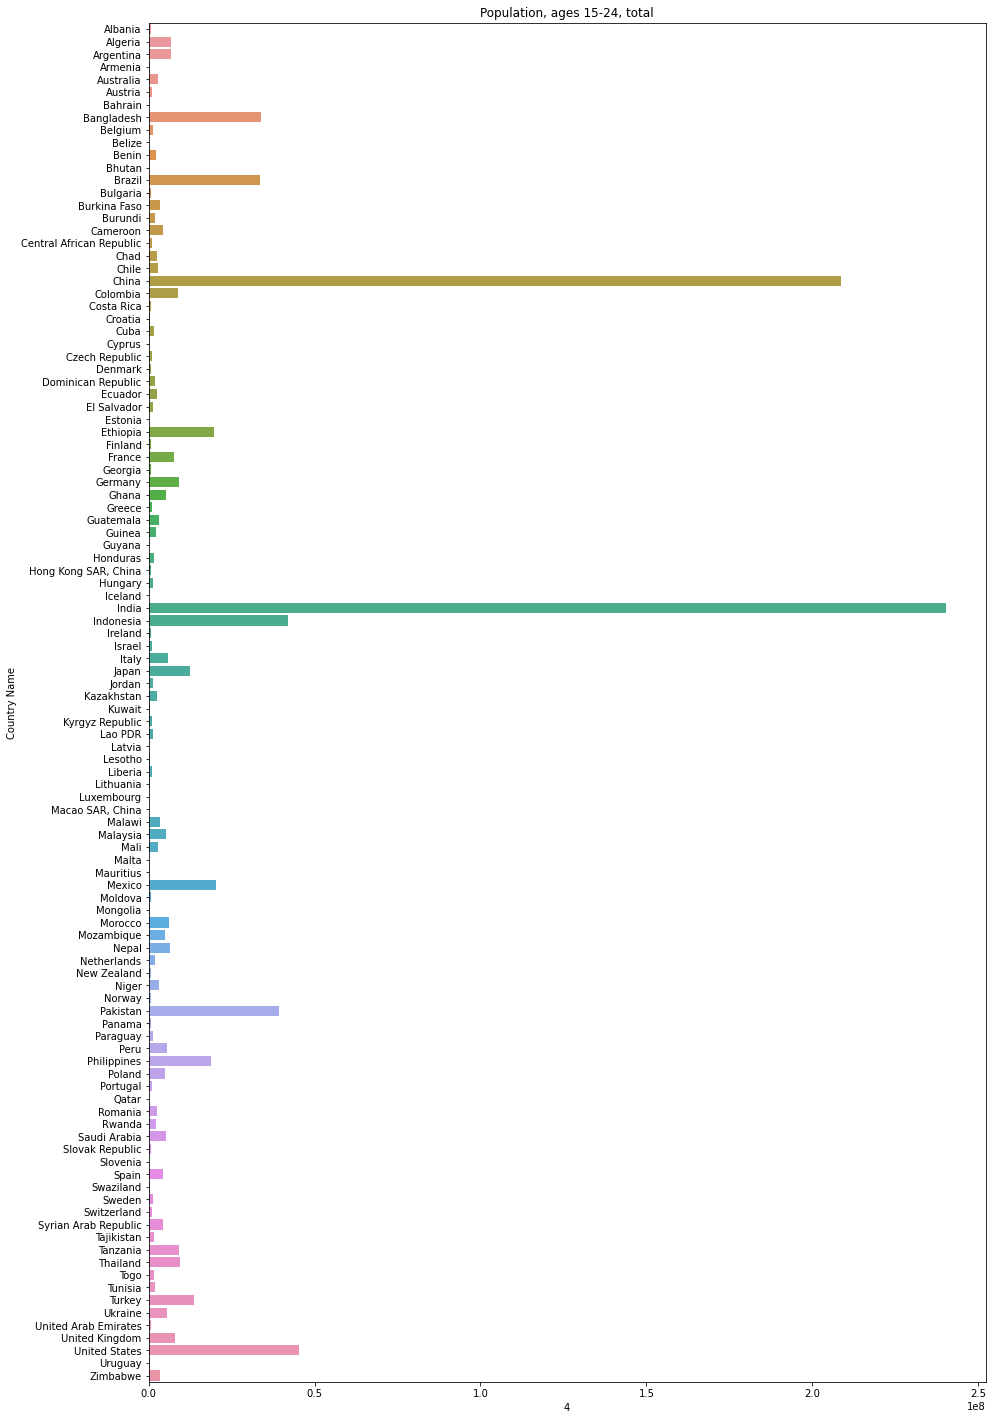

In [35]:
for i in range(len(indicateurs)):
    plt.figure(figsize=(15, 25))
    plt.title(str(indicateurs[i]))
    sns.barplot(data = recap_table_country, y = recap_table_country.index, 
                x = recap_table_country.columns[word_to_id[indicateurs[i]]])
    plt.show()

In [36]:
recap_table_region = indicators_data_copy.pivot_table(index= "Region", columns='Indicator Name', values='2010s',aggfunc='mean')
recap_table_region

Indicator Name,0,1,2,3,4
Region,,,,,
East Asia & Pacific,48.358041,1.487810e+08,4.046668e+06,5.355641e+06,2.316445e+07
Europe & Central Asia,68.263846,1.731753e+07,7.376201e+05,6.998657e+05,2.212812e+06
Latin America & Caribbean,40.762602,3.055970e+07,1.140202e+06,1.219701e+06,5.212070e+06
Middle East & North Africa,59.961013,1.381322e+07,4.223391e+05,4.943649e+05,2.379126e+06
North America,73.035771,3.162575e+08,2.027375e+07,1.172833e+07,4.524368e+07
South Asia,15.414601,3.292469e+08,6.410692e+06,1.276402e+07,6.398721e+07
Sub-Saharan Africa,10.742305,1.754067e+07,1.149653e+05,2.142156e+05,3.492959e+06


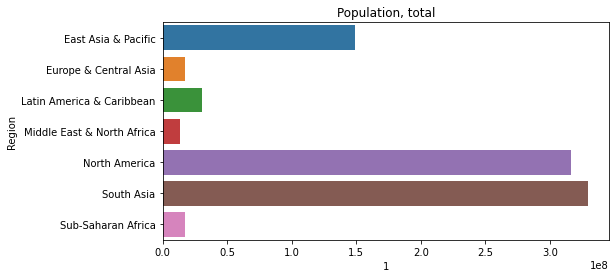

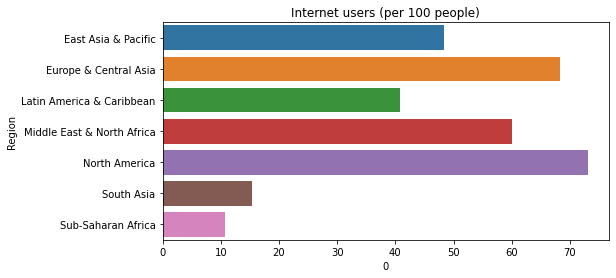

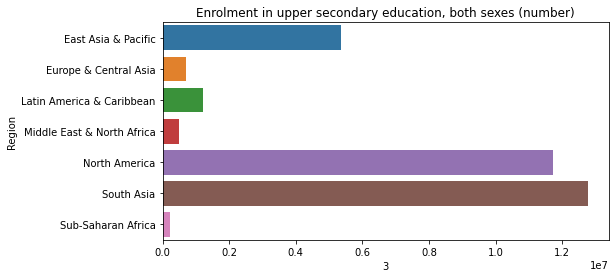

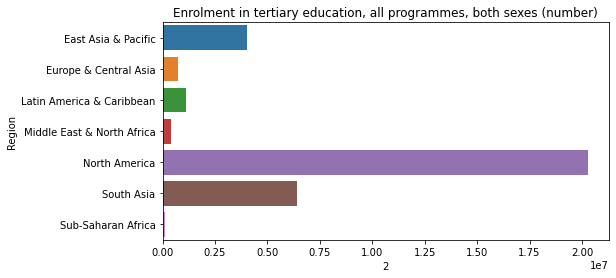

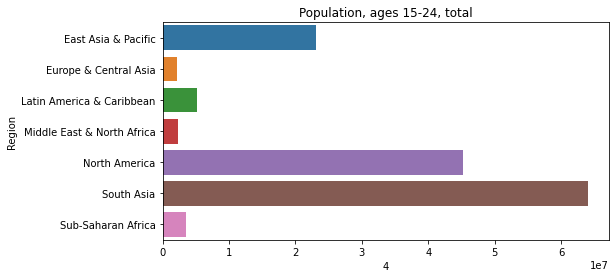

In [37]:
for i in range(len(indicateurs)):
    plt.figure(figsize=(8, 4))
    plt.title(str(indicateurs[i]))
    sns.barplot(data = recap_table_region, y = recap_table_region.index, 
                x = recap_table_region.columns[word_to_id[indicateurs[i]]])
    plt.show()

### Clients potentiels

In [38]:
estimated_client = recap_table_country[((recap_table_country[4]>15) & (recap_table_country[3] > 100000000)) |
                   ((recap_table_country[4]>60) & (recap_table_country[3] > 1000000))].sort_values(by='Country Name',ascending = False)
estimated_client

Indicator Name,0,1,2,3,4
Country Name,,,,,
United States,73.035771,3.162575e+08,2.027375e+07,1.172833e+07,4.524368e+07
United Kingdom,89.441457,6.417615e+07,2.441278e+06,3.325022e+06,7.904708e+06
Turkey,48.199775,7.584401e+07,4.701843e+06,4.105285e+06,1.380749e+07
Thailand,31.883003,6.809484e+07,2.404678e+06,2.090180e+06,9.403208e+06
Spain,72.825133,4.658360e+07,1.951797e+06,1.390776e+06,4.416110e+06
Saudi Arabia,58.725828,2.990058e+07,1.251994e+06,1.673103e+06,5.141140e+06
Poland,65.332414,3.802222e+07,1.980321e+06,1.486320e+06,4.853617e+06
Philippines,42.447732,9.849872e+07,3.130088e+06,1.570599e+06,1.879273e+07
Pakistan,11.339223,1.817855e+08,1.821696e+06,4.474131e+06,3.918865e+07


In [39]:
estimated_client['total_students'] = estimated_client[1] + estimated_client[2]
final_estimation = estimated_client.copy()
final_estimation = final_estimation.drop([0, 1, 2], axis=1)
final_estimation['estimated_clients'] = estimated_client['total_students']* (estimated_client[4]/100)

def pourcent(n):
    return n*100
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
score = scaler.fit_transform(np.array(final_estimation['estimated_clients']).reshape(-1,1))
final_estimation['Score'] = list(map(pourcent,score))
final_estimation

Indicator Name,3,4,total_students,estimated_clients,Score
Country Name,,,,,
United States,1.172833e+07,4.524368e+07,3.365312e+08,1.522591e+14,[4.833124289606838]
United Kingdom,3.325022e+06,7.904708e+06,6.661743e+07,5.265913e+12,[0.14516799208931316]
Turkey,4.105285e+06,1.380749e+07,8.054586e+07,1.112136e+13,[0.3319118433995438]
Thailand,2.090180e+06,9.403208e+06,7.049952e+07,6.629216e+12,[0.18864689857669756]
Spain,1.390776e+06,4.416110e+06,4.853540e+07,2.143377e+12,[0.04558302359191086]
Saudi Arabia,1.673103e+06,5.141140e+06,3.115258e+07,1.601597e+12,[0.028304418595325266]
Poland,1.486320e+06,4.853617e+06,4.000255e+07,1.941570e+12,[0.03914694779478052]
Philippines,1.570599e+06,1.879273e+07,1.016288e+08,1.909883e+13,[0.586331954319887]
Pakistan,4.474131e+06,3.918865e+07,1.836072e+08,7.195321e+13,[2.2719811951750177]


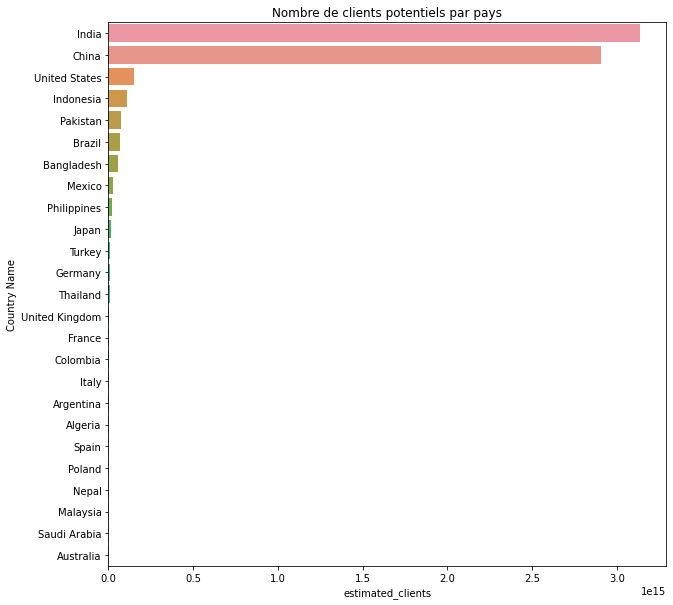

In [40]:
plt.figure(figsize = (10,10))
plt.title('Nombre de clients potentiels par pays')
ax = plt.gca()
final_estimation = final_estimation.sort_values(['estimated_clients'], ascending = False).reset_index()
sns.barplot(x = final_estimation['estimated_clients'], y=final_estimation['Country Name'])
plt.show()

In [41]:
valid_countries = final_estimation[final_estimation['estimated_clients'] > 1000000]['Country Name'].tolist()
print(valid_countries)

['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Bangladesh', 'Mexico', 'Philippines', 'Japan', 'Turkey', 'Germany', 'Thailand', 'United Kingdom', 'France', 'Colombia', 'Italy', 'Argentina', 'Algeria', 'Spain', 'Poland', 'Nepal', 'Malaysia', 'Saudi Arabia', 'Australia']


In [42]:
word_to_id

{'Internet users (per 100 people)': 0,
 'Population, total': 1,
 'Enrolment in tertiary education, all programmes, both sexes (number)': 2,
 'Enrolment in upper secondary education, both sexes (number)': 3,
 'Population, ages 15-24, total': 4}

### Prévisions pour le futur

In [43]:
new_data_future = new_data.copy()

new_data_future.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009','Indicator Code','Country Code','Unnamed: 69'], axis=1, inplace=True)

new_data_future_country = new_data_future[new_data_future['Country Name'].isin(valid_countries)]
#print(set(new_data_future_country['Country Name'].to_list()))
new_data_future_country = new_data_future_country[new_data_future_country['Indicator Name'].isin(indicateurs)]

new_data_future_country.head(5)

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
100159,Algeria,"Enrolment in tertiary education, all programme...",1144271.0,1188562.0,1210272.0,1252579.0,1245478.0,1289474.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100169,Algeria,"Enrolment in upper secondary education, both s...",1306432.0,1332584.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100330,Algeria,Internet users (per 100 people),12.5,14.9,18.2,22.5,29.5,38.2,4.294553e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101437,Algeria,"Population, ages 15-24, total",7245764.0,7118500.0,6964424.0,6795040.0,6625398.0,6467818.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101488,Algeria,"Population, total",36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,4.060605e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


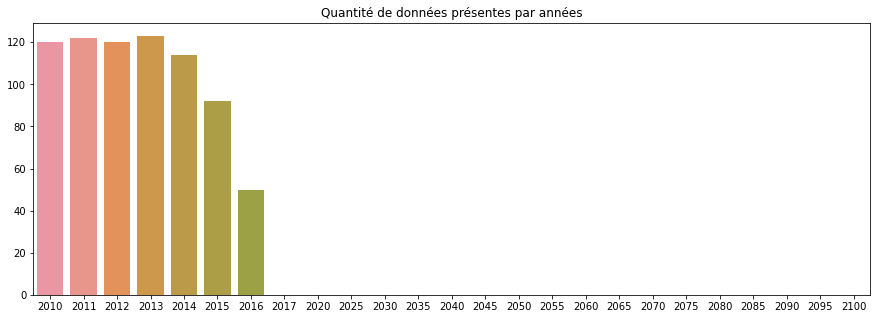

In [44]:
plt.figure(figsize=(15, 5))
all_years = new_data_future_country.columns.to_list()
all_years.remove("Country Name")
all_years.remove("Indicator Name")
#print(all_years)
plt.title('Quantité de données présentes par années')
plot = sns.barplot(y = new_data_future_country.groupby('Country Name')[all_years].count().sum().values, 
                  x = new_data_future_country.groupby('Country Name')[all_years].count().sum().index)
plt.show()

In [45]:
new_data_future_country.drop(['2017','2020','2025','2030','2035','2040','2045','2050','2055',
                      '2060','2065','2070','2075','2080','2085','2090','2095','2100'], axis=1, inplace=True)

In [46]:
new_data_future_country.head(5)

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016
100159,Algeria,"Enrolment in tertiary education, all programme...",1144271.0,1188562.0,1210272.0,1252579.0,1245478.0,1289474.0,NaN
100169,Algeria,"Enrolment in upper secondary education, both s...",1306432.0,1332584.0,NaN,NaN,NaN,NaN,NaN
100330,Algeria,Internet users (per 100 people),12.5,14.9,18.2,22.5,29.5,38.2,4.294553e+01
101437,Algeria,"Population, ages 15-24, total",7245764.0,7118500.0,6964424.0,6795040.0,6625398.0,6467818.0,NaN
101488,Algeria,"Population, total",36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,4.060605e+07


In [47]:
new_data_future_country_copy = new_data_future_country.copy()
new_data_future_country_copy.loc[:,'Indicator Name'] = new_data_future_country['Indicator Name'].map(word_to_id)
new_data_future_country_copy

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016
100159,Algeria,2,1.144271e+06,1.188562e+06,1210272.0,1252579.0,1245478.0,1.289474e+06,NaN
100169,Algeria,3,1.306432e+06,1.332584e+06,NaN,NaN,NaN,NaN,NaN
100330,Algeria,0,1.250000e+01,1.490000e+01,18.2,22.5,29.5,3.820000e+01,4.294553e+01
101437,Algeria,4,7.245764e+06,7.118500e+06,6964424.0,6795040.0,6625398.0,6.467818e+06,NaN
101488,Algeria,1,3.611764e+07,3.681956e+07,37565847.0,38338562.0,39113313.0,3.987153e+07,4.060605e+07
...,...,...,...,...,...,...,...,...,...
847819,United States,2,2.042771e+07,2.101613e+07,20994112.0,19972624.0,19700220.0,1.953173e+07,NaN
847829,United States,3,1.170128e+07,1.180938e+07,11748263.0,11646415.0,11736315.0,NaN,NaN
847990,United States,0,7.169000e+01,6.972946e+01,74.7,71.4,73.0,7.455420e+01,7.617674e+01
849097,United States,4,4.513709e+07,4.529614e+07,45343097.0,45307415.0,45230846.0,4.514752e+07,NaN


In [48]:
years = ['2010','2011','2012','2013','2014','2015','2016']
new_data_future_country_copy['Years']= new_data_future_country_copy[years].values.tolist()
evolution_list = new_data_future_country_copy.groupby(['Country Name','Indicator Name'])['Years'].apply(list).to_dict()

for key, value in evolution_list.items():
    print(key, ' : ', value)

('Algeria', 0)  :  [[12.5, 14.9, 18.2, 22.5, 29.5, 38.2, 42.94552688]]
('Algeria', 1)  :  [[36117637.0, 36819558.0, 37565847.0, 38338562.0, 39113313.0, 39871528.0, 40606052.0]]
('Algeria', 2)  :  [[1144271.0, 1188562.0, 1210272.0, 1252579.0, 1245478.0, 1289474.0, nan]]
('Algeria', 3)  :  [[1306432.0, 1332584.0, nan, nan, nan, nan, nan]]
('Algeria', 4)  :  [[7245764.0, 7118500.0, 6964424.0, 6795040.0, 6625398.0, 6467818.0, nan]]
('Argentina', 0)  :  [[45.0, 51.0, 55.8, 59.9, 64.7, 68.04306411, 70.15076431]]
('Argentina', 1)  :  [[41223889.0, 41656879.0, 42096739.0, 42539925.0, 42981515.0, 43417765.0, 43847430.0]]
('Argentina', 2)  :  [[2520985.0, 2660514.0, 2726557.0, 2768211.0, 2869450.0, nan, nan]]
('Argentina', 3)  :  [[1520478.0, 1651653.0, 1685178.0, 1722700.0, nan, nan, nan]]
('Argentina', 4)  :  [[6828321.0, 6858723.0, 6880259.0, 6892160.0, 6894149.0, 6886530.0, nan]]
('Australia', 0)  :  [[76.0, 79.48769771, 79.0, 83.45349717, 84.0, 84.56051935, 88.23865805]]
('Australia', 1)  :

In [49]:
all_possible_countries = set(new_data_future_country_copy["Country Name"].to_list())
print(all_possible_countries)

{'Bangladesh', 'China', 'Philippines', 'Nepal', 'Pakistan', 'Brazil', 'Indonesia', 'Mexico', 'Spain', 'India', 'Germany', 'Turkey', 'Australia', 'Malaysia', 'United Kingdom', 'Algeria', 'France', 'Argentina', 'Colombia', 'Japan', 'Poland', 'United States', 'Italy', 'Thailand', 'Saudi Arabia'}


In [50]:
final_dataframe = new_data_future_country.copy()
final_dataframe = final_dataframe.melt(id_vars = ['Country Name', 'Indicator Name'], value_vars = ['2013'], 
                                                 var_name = 'Year', value_name = 'Value')
final_dataframe.loc[:,'Indicator Name'] = final_dataframe['Indicator Name'].map(word_to_id)
final_dataframe

,Country Name,Indicator Name,Year,Value
0,Algeria,2,2013,1252579.0
1,Algeria,3,2013,NaN
2,Algeria,0,2013,22.5
3,Algeria,4,2013,6795040.0
4,Algeria,1,2013,38338562.0
...,...,...,...,...
120,United States,2,2013,19972624.0
121,United States,3,2013,11646415.0
122,United States,0,2013,71.4
123,United States,4,2013,45307415.0


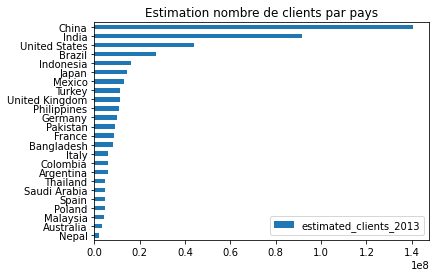

In [51]:
estimated_students_2013 = {}

for country in all_possible_countries:
    n0 = final_dataframe.loc[(final_dataframe['Country Name'] == country) & (final_dataframe['Indicator Name'] == 0)]["Value"]
    n3 = final_dataframe.loc[(final_dataframe['Country Name'] == country) & (final_dataframe['Indicator Name'] == 3)]["Value"]
    n4 = final_dataframe.loc[(final_dataframe['Country Name'] == country) & (final_dataframe['Indicator Name'] == 4)]["Value"]
    estimated_students_2013[country] = float(n3)+float(n4) * (float(n0)/100)
    
final_estimation = pd.DataFrame.from_dict(estimated_students_2013,orient='index',columns=['estimated_clients_2013'])
final_estimation = final_estimation.dropna()
final_estimation = final_estimation.sort_values(by = ["estimated_clients_2013"])

final_estimation.plot(kind = "barh")
plt.title("Estimation nombre de clients par pays")
plt.show()

## Conclusion